<a href="https://colab.research.google.com/github/SMAHAM/Scene-Recognization/blob/master/scene_reorganization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multimodal scene reorganization for audio Categorization

# Installation of required librearies

In [0]:
#!pip3 install librosa
#!pip install download

# Import Libraries

In [0]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np
import pandas as pd
from PIL import Image
%matplotlib inline
# For plotting headlessly
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from download import download

# File downloader

In [88]:
url = 'https://github.com/SMAHAM/Scene-Recognization/blob/master/UrbanSound_data/air_conditioner/13230.mp3'
download(url,'./'+url.rsplit('/', 1)[-1])
url = 'https://github.com/SMAHAM/Scene-Recognization/blob/master/UrbanSound_data/car_horn/2937.wav'
download(url,'./'+url.rsplit('/', 1)[-1])
url = 'https://github.com/SMAHAM/Scene-Recognization/blob/master/UrbanSound_data/children_playing/13579.mp3'
download(url,'./'+url.rsplit('/', 1)[-1])
url = 'https://github.com/SMAHAM/Scene-Recognization/blob/master/UrbanSound_data/dog_bark/344.wav'
download(url,'./'+url.rsplit('/', 1)[-1])
url = 'https://github.com/SMAHAM/Scene-Recognization/blob/master/UrbanSound_data/drilling/518.wav'
download(url,'./'+url.rsplit('/', 1)[-1])
url = 'https://github.com/SMAHAM/Scene-Recognization/blob/master/UrbanSound_data/engine_idling/6988.mp3'
download(url,'./'+url.rsplit('/', 1)[-1])
url = 'https://github.com/SMAHAM/Scene-Recognization/blob/master/UrbanSound_data/gun_shot/7060.wav'
download(url,'./'+url.rsplit('/', 1)[-1])
url = 'https://github.com/SMAHAM/Scene-Recognization/blob/master/UrbanSound_data/jackhammer/24728.wav'
download(url,'./'+url.rsplit('/', 1)[-1])
url = 'https://github.com/SMAHAM/Scene-Recognization/blob/master/UrbanSound_data/siren/16772.wav'
download(url,'./'+url.rsplit('/', 1)[-1])
url = 'https://github.com/SMAHAM/Scene-Recognization/blob/master/UrbanSound_data/street_music/6508.mp3'
download(url,'./'+url.rsplit('/', 1)[-1])

file_sizes: 100%|████████████████████████████| 981k/981k [00:00<00:00, 23.1MB/s]


Successfully downloaded file to ./13230.mp3



file_sizes: 100%|████████████████████████████| 145k/145k [00:00<00:00, 7.21MB/s]


Successfully downloaded file to ./2937.wav



file_sizes: 100%|██████████████████████████| 6.54M/6.54M [00:00<00:00, 85.3MB/s]


Successfully downloaded file to ./13579.mp3




file_sizes: 100%|████████████████████████████| 933k/933k [00:00<00:00, 21.5MB/s]
file_sizes: 100%|████████████████████████████| 918k/918k [00:00<00:00, 21.8MB/s]


Successfully downloaded file to ./344.wav

Successfully downloaded file to ./518.wav


file_sizes: 100%|████████████████████████████| 437k/437k [00:00<00:00, 12.7MB/s]



Successfully downloaded file to ./6988.mp3



file_sizes: 100%|██████████████████████████| 1.33M/1.33M [00:00<00:00, 30.2MB/s]
file_sizes:   0%|                                   | 0.00/20.3M [00:00<?, ?B/s]

Successfully downloaded file to ./7060.wav



file_sizes: 100%|███████████████████████████| 20.3M/20.3M [00:00<00:00, 143MB/s]
file_sizes: 100%|████████████████████████████| 376k/376k [00:00<00:00, 13.4MB/s]


Successfully downloaded file to ./24728.wav

Successfully downloaded file to ./16772.wav


file_sizes: 100%|████████████████████████████| 600k/600k [00:00<00:00, 17.0MB/s]


Successfully downloaded file to ./6508.mp3


'./6508.mp3'

# MFCC generator

In [0]:
def make_mfcc(filename,file_ext,path='./',crop_area=(50, 50, 306, 306),sr=44100,hop_length=512,n_mfcc = 13):
  sig, rate = librosa.load(path+filename+file_ext, sr=sr)
  mfcc = librosa.feature.mfcc(y=sig, sr=rate, hop_length=hop_length, n_mfcc=n_mfcc)
  mfcc_result = librosa.display.specshow(mfcc, sr=sr, hop_length=hop_length, ax=ax)
  img_name = filename+'_mfcc.png'
  print(img_name)
  fig.savefig(path+img_name)
  img = Image.open(path+img_name)
  cropped_img = img.crop(crop_area)
  plt.axis('off')
  imgplot = plt.imshow(cropped_img)
  cropped_img.save(img_name)

13230_mfcc.png


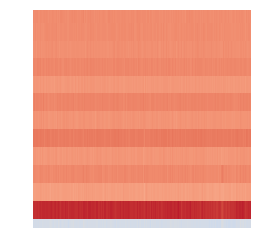

# STFT generator

# Settings

In [38]:
n_mfcc = 13
#Store the sampling rate as `sr`
sr = 44100
# ---Set the hop length; at 22050 Hz, 512 samples ~= 23ms
hop_length = 512
window_size = 1024

plt.subplots_adjust(wspace=0, hspace=0)
fig = plt.Figure(figsize=(5,5))
canvas = FigureCanvas(fig)
ax = fig.add_subplot(111)
ax.axis('off')
#cropping area
area = (50, 50, 306, 306)

<Figure size 432x288 with 0 Axes>

# Air Conditioner 

## MFCC

13230_mfcc.png


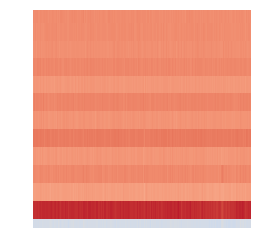

In [96]:
make_mfcc('13230','.mp3')

## STFT

13230_stft.png


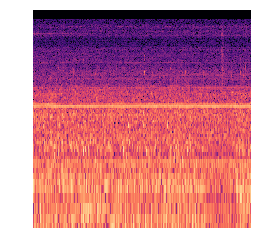

In [41]:
y = sig[:100000] # shorten audio a bit for speed

window = np.hanning(window_size)
stft  = librosa.core.spectrum.stft(y=sig, n_fft=window_size, hop_length=hop_length, window=window)
out = 2 * np.abs(stft) / np.sum(window)

p = librosa.display.specshow(librosa.amplitude_to_db(out, ref=np.max), ax=ax, y_axis='log', x_axis='time')
img_name = filename+'_stft.png'
print(img_name)
fig.savefig(img_name)

img = Image.open(img_name)
cropped_img = img.crop(area)
plt.axis('off')
imgplot = plt.imshow(cropped_img)
cropped_img.save(img_name)

# Car Horn

## Downlod file

In [0]:
!wget https://github.com/SMAHAM/Scene-Recognization/blob/master/UrbanSound_data/car_horn/2937.wav?raw=true -O 2937.wav > /dev/null 2>&1
filename = '2937'
file_ext = '.wav'
#load in librosa
sig, rate = librosa.load(filename+file_ext, sr=sr)

2937_mfcc.png


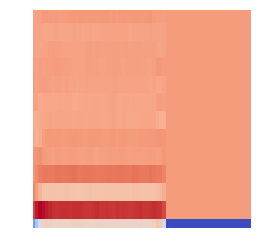

In [43]:
mfcc = librosa.feature.mfcc(y=sig, sr=rate, hop_length=hop_length, n_mfcc=n_mfcc)

librosa.display.specshow(mfcc, sr=sr, hop_length=hop_length, ax=ax)
img_name = filename+'_mfcc.png'
print(img_name)
fig.savefig(img_name)

img = Image.open(img_name)
cropped_img = img.crop(area)
plt.axis('off')
imgplot = plt.imshow(cropped_img)
cropped_img.save(img_name)

2937_stft.png


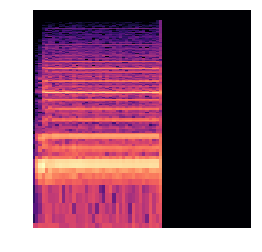

In [44]:
y = sig[:100000] # shorten audio a bit for speed

window = np.hanning(window_size)
stft  = librosa.core.spectrum.stft(y=sig, n_fft=window_size, hop_length=hop_length, window=window)
out = 2 * np.abs(stft) / np.sum(window)

p = librosa.display.specshow(librosa.amplitude_to_db(out, ref=np.max), ax=ax, y_axis='log', x_axis='time')
img_name = filename+'_stft.png'
print(img_name)
fig.savefig(img_name)

img = Image.open(img_name)
cropped_img = img.crop(area)
plt.axis('off')
imgplot = plt.imshow(cropped_img)
cropped_img.save(img_name)

In [26]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
60000/60000 [==============================] - 8s 139us/sample - loss: 0.2181 - acc: 0.9356
Epoch 2/5
60000/60000 [==============================] - 8s 137us/sample - loss: 0.0969 - acc: 0.9703
Epoch 3/5
60000/60000 [==============================] - 8s 137us/sample - loss: 0.0684 - acc: 0.9779
Epoch 4/5
60000/60000 [==============================] - 8s 141us/sample - loss: 0.0531 - acc: 0.9830
Epoch 5/5
10000/10000 [==============================] - 1s 58us/sample - loss: 0.0628 - acc: 0.9822


[0.06279229040378705, 0.9822]

In [45]:
pip install download

In [67]:
!pwd

/content


RuntimeError: ignored

In [49]:
import inspect
inspect.signature(download).parameters

mappingproxy({'kind': <Parameter "kind='file'">,
              'path': <Parameter "path">,
              'progressbar': <Parameter "progressbar=True">,
              'replace': <Parameter "replace=False">,
              'url': <Parameter "url">,
              'verbose': <Parameter "verbose=True">})

In [81]:
url = 'https://github.com/SMAHAM/Scene-Recognization/blob/master/UrbanSound_data/children_playing/13579.mp3'
url.rsplit('/', 1)[-1]

'13579.mp3'